# MDAnalysis: An interoperable library for simulation analysis

<center>Irfan Alibay, The University of Oxford</center>

## Acknowledgements

* MDAnalysis is community driven project with code contributions from 122 authors, including 13 core developers, over a 16 year period (as of January 2021)

* Our user base which continues to report bugs and request features

* NumFOCUS our fiscal sponsor

* Various funding agencies over the years

<center><img src="imgs/numfocus-sponsored.png" alt="numfocus" style="width: 200px;"/></center>

<center><img src="imgs/gsoc2016-sun-373x373.png" alt="gsoc" style="width: 200px;"/></center>

<center><img src="imgs/nsf.jpg" alt="nsf" style="width: 200px;"/></center>

## Simulation analysis workflow

<center><img src="imgs/Analysis-workflow1.png" alt="github" style="width: 1500px;"/></center>

## Simulation analysis workflow - towards a data centric future

<center><img src="imgs/Analysis-workflow2.png" alt="github" style="width: 1500px;"/></center>

## Simulation analysis workflow - MDAnalysis is not unique

<center><img src="imgs/Analysis-workflow3.png" alt="github" style="width: 1500px;"/></center>

## Why MDAnalysis?

* MDAnalysis is not the fastest or the most feature complete tool

* Offers some unique advantage
  * Transparent & platform independent
  * Extensive trajectory and topology format support
  * Focus on flexibility and extensibility
    * Python backend is simple and intuitive
  * Provide tools to build tools
  * Large active user and developer base
  * Plays well with other tools

## MDAnalysis overview

* Python w/ C library backend
  * NumPy centric datastructures
  * python 2.7, 3.5-3.8
* ~ 100k lines of code
* Extensively tested
  * ~ 93% line coverage

<center><img src="imgs/MDA-overview.png" alt="MDA-overview" style="width: 700px;"/></center>

## MDAnalysis - topology and trajectory readers

* Built-in topology & trajectory readers/writers
  * 27 topology (read only)
  * 23 structure formats (read/write)
  
* Extra formats via chemfiles interface

<center><img src="imgs/readers-writers.png" alt="MDA-overview" style="width: 700px;"/></center>

## MDAnalysis: basic data structure (Universe)

In [13]:
import MDAnalysis as mda
from MDAnalysisTests.datafiles import (PRM_NCBOX,
                                       TRJ_NCBOX)

u = mda.Universe(PRM_NCBOX, TRJ_NCBOX)

print(u)
print(u.bonds)
print(u.angles)
print(u.dihedrals)
print(u.atoms.names)

<Universe with 1398 atoms>
<TopologyGroup containing 1397 bonds>
<TopologyGroup containing 7 angles>
<TopologyGroup containing 3 dihedrals>
['H1' 'CH3' 'H2' ... 'O' 'H1' 'H2']


<center><img src="imgs/MDA-workflow-universe.png" alt="MDA-overview" style="width: 700px;"/></center>

## MDAnalysis: Universes of AtomGroups

In [2]:
print(u.atoms)

<AtomGroup [<Atom 1: H1 of type HC of resname ACE, resid 1 and segid SYSTEM>, <Atom 2: CH3 of type CT of resname ACE, resid 1 and segid SYSTEM>, <Atom 3: H2 of type HC of resname ACE, resid 1 and segid SYSTEM>, ..., <Atom 1396: O of type OW of resname WAT, resid 465 and segid SYSTEM>, <Atom 1397: H1 of type HW of resname WAT, resid 465 and segid SYSTEM>, <Atom 1398: H2 of type HW of resname WAT, resid 465 and segid SYSTEM>]>


<center><img src="imgs/MDA-workflow-universe.png" alt="MDA-overview" style="width: 700px;"/></center>

## MDAnalysis: Universes of AtomGroups

In [3]:
# string based selection

protein = u.select_atoms('protein')

print(protein) # ACE atoms

print('\n')

water = u.select_atoms('resname WAT')
print(water)

<AtomGroup [<Atom 1: H1 of type HC of resname ACE, resid 1 and segid SYSTEM>, <Atom 2: CH3 of type CT of resname ACE, resid 1 and segid SYSTEM>, <Atom 3: H2 of type HC of resname ACE, resid 1 and segid SYSTEM>, <Atom 4: H3 of type HC of resname ACE, resid 1 and segid SYSTEM>, <Atom 5: C of type C of resname ACE, resid 1 and segid SYSTEM>, <Atom 6: O of type O of resname ACE, resid 1 and segid SYSTEM>]>


<AtomGroup [<Atom 7: O of type OW of resname WAT, resid 2 and segid SYSTEM>, <Atom 8: H1 of type HW of resname WAT, resid 2 and segid SYSTEM>, <Atom 9: H2 of type HW of resname WAT, resid 2 and segid SYSTEM>, ..., <Atom 1396: O of type OW of resname WAT, resid 465 and segid SYSTEM>, <Atom 1397: H1 of type HW of resname WAT, resid 465 and segid SYSTEM>, <Atom 1398: H2 of type HW of resname WAT, resid 465 and segid SYSTEM>]>


<center><img src="imgs/MDA-workflow-universe.png" alt="MDA-overview" style="width: 700px;"/></center>

## NumPy datastructures

In [4]:
print(protein.atoms.positions) # XYZ coordinate array

[[15.249873  12.578178  15.191731 ]
 [14.925511  13.58888   14.944009 ]
 [15.285703  14.3409605 15.645962 ]
 [13.840843  13.6347475 15.041435 ]
 [15.2940445 14.233009  13.608262 ]
 [14.439755  14.561243  12.855946 ]]


In [5]:
protein.atoms.forces

array([[ 3.59128952e+01,  7.54111338e+00, -6.27739983e+01],
       [-9.03527908e+01,  1.63559509e+02,  2.74803581e+01],
       [ 1.82548599e+01, -5.07735252e+01,  1.87340508e+01],
       [ 5.55083938e-02, -3.06680317e+01, -1.42093458e+01],
       [ 1.53188171e+02, -1.51061050e+02,  1.30672211e+02],
       [-1.23743095e+02,  6.80953064e+01, -9.72541275e+01]], dtype=float32)

## Trajectory access

In [6]:
print(f"number of frames: {u.trajectory.n_frames}\n")

for ts in u.trajectory:
    print(u.atoms[0].position)

number of frames: 10

[15.249873 12.578178 15.191731]
[13.802418 13.771645 13.351839]
[16.774944 14.357913 13.739776]
[16.029173 12.944326 15.759931]
[14.890728 13.706805 16.154305]
[15.905292 13.544387 16.146898]
[15.79226   12.6949625 15.421089 ]
[16.370102 16.812826 15.066112]
[14.799454 15.214347 14.714555]
[14.392319 16.360231 14.511796]


* Universe values get updated with frame information as you traverse through a trajectory

* Updates coordinates/velocities/forces

* Random access is possible

* Can't do grand canonical!

## Analysis: RMSF example

* Root mean square flucturation measures local flexibility in amino acids

<center><img src="imgs/rmsf-eq.png" alt="MDA-overview" style="width: 300px;"/></center>


<center><img src="imgs/MDA-workflow-analysis.png" alt="MDA-overview" style="width: 700px;"/></center>

## Analysis: RMSF example

* Root mean square flucturation measures local flexibility in amino acids

<center><img src="imgs/rmsf-eq.png" alt="MDA-overview" style="width: 300px;"/></center>

* Do RMSF of atoms in ACE residue

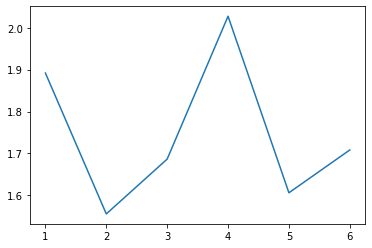

In [7]:
import numpy as np # to store data
import matplotlib.pyplot as plt # to plot the data

ace = u.select_atoms('resname ACE')
means = np.zeros((len(ace), 3))
sumsq = np.zeros_like(means)

for k, ts in enumerate(u.trajectory):
    sumsq += (k/(k+1)) * (ace.positions - means)**2
    means[:] = (k*means + ace.positions) / (k+1)
    
rmsf = np.sqrt(sumsq.sum(axis=1)/(k+1))

%matplotlib inline
plt.plot(ace.atoms.ids, rmsf)

## Analysis: RMSF example

* MDAnalysis provides built-in analysis routines

* Includes:
  * RMSD, RMSF, MSD, contacts, diffusion, distances
  * helix, leaflet, density, nucl info, pca, polymer
  * and many more...

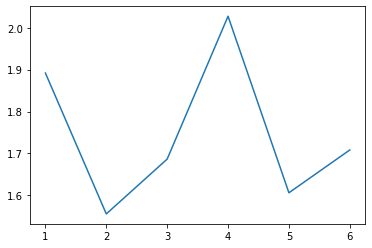

In [8]:
from MDAnalysis.analysis import rms

R = rms.RMSF(ace).run()

plt.plot(ace.atoms.ids, R.rmsf)

## Interactive visualisation

* Can visualise MDAnalysis Universes and AtomGroups

* Uses NGLView translation layer

* Possible using jupyter notebooks

In [9]:
import nglview as nv

protein = u.select_atoms('resname ACE')

w = nv.show_mdanalysis(protein)
w

NGLWidget(max_frame=9)

## MDAnalysis and the interoperable future

* BioExcel + MOLSSI 2019: general lack of interoperability between molecular modelling software
  * Duplication of efforts
  * Homebrewed / untested conversions
  * Bad format adherence
  
* MDAnalysis aims to pave the way towards an interoperable future
  * Provide accurate translation layers to/from MDAnalysis datastructures to other packages
  * Currently have layers for:
    * Chemfiles
    * ParmED
    * RDKIT

## MDAnalysis + RDKIT interoperability (MDA -> RDKIT)

* Seemless interagration between RDKIT and MDAnalysis
  * Given you have hydrogens and bonds
  
* Allows for complex MD + cheminformatics analysis
  * Already in use by industrial partners

<RDKitReader with 10 frames of 9 atoms>


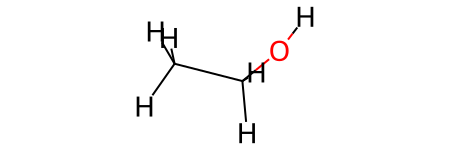

In [10]:
# Create MDA universes from smiles
u = mda.Universe.from_smiles('CCO', numConfs=10) 
print(u.trajectory)
mol = u.atoms.convert_to('RDKIT')
mol

## MDAnalysis + RDKIT interoperability (RDKIT -> MDA)

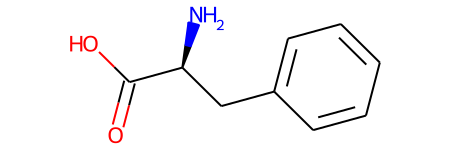

In [11]:
from rdkit import Chem

mol = Chem.MolFromSequence('F')
mol

In [12]:
u = mda.Universe(mol)
u.select_atoms('aromatic')

/home/bioc1523/github/mdanalysis/package/MDAnalysis/coordinates/RDKit.py:145: UserWarning: No coordinates found in the RDKit molecule
  warnings.warn("No coordinates found in the RDKit molecule")


<AtomGroup with 6 atoms>

## MDAnalysis and the interoperable future

* Aim for 2021 to build
  * QM code layers (ASE, psi4)
  * MD code layers (OpenMM)
  * Cross analysis layers (MDTraj, pytraj)

## Getting started with MDAnalysis

* Near-complete cross-platform compatibility
  * No support for Apple M1 processors

* Installable via `conda` or `pip`
  * Support py2.7, py3.5->3.9
  
* Extensively documented in our userguide (inc. examples): https://userguide.mdanalysis.org/

<center><img src="imgs/MDA-userguide.png" alt="github" style="width: 700px;"/></center>

## Getting involved

* Open source code on Github

* We rely on community contributions!

* Tackle existing issue or your own

* Fully open contribution process
  * Pull Request -> Review -> Merge

* Developer mailing list:
https://groups.google.com/forum/#!forum/mdnalysis-devel

<center><img src="imgs/MDA-github.png" alt="github" style="width: 700px;"/></center>

## Google Summer of Code

* Google funded summer programme for students (inc. PhD students)
  * 10 week (175 h) programming projects
  * ~ $2000 stipend for students
  
* MDAnalysis usually takes on 1-2 students / year

* Projects
  * Bring your own project (recommended)
  * Choose one of the MDAnalysis priority projects

<center><img src="imgs/gsoc2016-sun-373x373.png" alt="gsoc" style="width: 300px;"/></center>

## Google Summer of Code

* More details: https://github.com/MDAnalysis/mdanalysis/wiki/Project-Ideas-2021

* Application process:
  * Community introduction
  * Merge 1 code contribution
  * Submit a project proposal

<center><img src="imgs/gsoc2016-sun-373x373.png" alt="gsoc" style="width: 300px;"/></center>